### Prélude : équations différentielles d'ordre supérieur

On peut toujours écrire $\frac{d^n y(t)}{dx^n} = y^{(n)} = f(t, y, y^{(1)}, y^{(2)},..., y^{(n)})$ sous la forme d'un système d'équations différentielles d'ordre 1.

En effet les méthodes de résolutions qui vont suivre sont faite pour résoudre des équations différentielles du premier ordre. Il sera donc utile de réécrire nos équations différentielles d'ordre supérieur sous la forme d'un système d'équation du 1er ordre.

$$
y^{(n)} = 
\begin{cases}
   y'_0 = y^{(1)} \\
   ... \\
   y'_n = y^{(n)}
\end{cases}
$$

**exemple : mécanique**:

$$
y^{(2)} = 
\begin{cases}
   x' = v \\
   v' = a
\end{cases}
$$

### Euler (1er ordre) : 

= Développement de Taylor d'ordre 1

Principe : on part des conditions initiales et on évalue la valeur des dérivées à chaque pas de temps (voir schéma)

<img src="../figures/euler.jpg" width="450px">

**conditions initiales**:

$y(t_0) = y_0$ => ex: $y(0) = 0$    
$y'(t) = f(t, y(t))$ => ex: $y'(t) = y(t)$

La valeur de h est choisie arbitrairement. Par exemple je peux choisir d'évaluer la valeur de la solution toutes les 10 secondes. Plus le pas de temps est court, plus l'approximation de l'EDO est précise.

Soit : $t_n = t_0 + nh$ => $t_{n+1} = t_n + h$

Donc : $y_{n+1} = y(t_{n+1}) = y(t_n + h) \approx y(t_n) + h y'(t_n)$ (par Taylor)

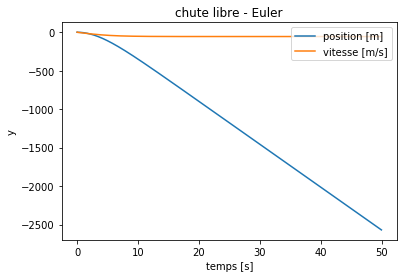

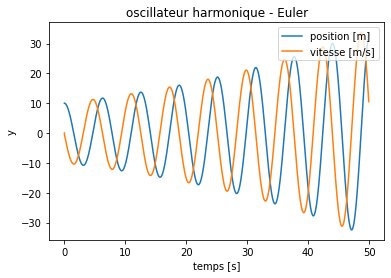

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

class EulerMethod():
  def __init__(self, title, edo, t0, ci, time_interval, stop):
    # title of the graph
    self.title = title
    # function that return [y' = CI, y'' = EDO] as a matrix
    self.edo = edo
    self.t0 = t0
    # [y(0), y'(0)]
    self.ci = ci
    self.time_interval = time_interval
    self.stop = stop
    self.time_set = [self.t0]
    self.y_set = [self.ci[:]]
    self.edo_legends = ['position [m]', 'vitesse [m/s]']


  def graph(self): 
    plt.plot(self.time_set, self.y_set)
    plt.title(self.title)
    plt.legend(self.edo_legends, loc="upper right")
    plt.xlabel("temps [s]") 
    plt.ylabel("y")
    plt.show()

  def resolve(self):
    y = list(self.ci) # [y(t0), y'(t0)]

    # range function for float
    for t in np.arange(self.t0, self.stop, self.time_interval):
      # update system of edo for the point we're in
      system = self.edo(t, y)
      # matrix multiplication by a scalar
      y += self.time_interval * system

      self.time_set.append(t)
      # [:] allow that modifying y do not modify y_set because of references
      # for numpy array, use copy() method
      self.y_set.append(y.copy())
    
    self.y_set = np.array(self.y_set)
    
    
t0 = 0
time_interval = 0.05
stop = 50

# function F(t, y)
"""
y => [y, y', y'',...]
"""
def free_fall(t, y):
  # edo as a system of first order edo
  return np.array([
    y[1], # y'
    - 9.81 - 0.00315 * abs(y[1]) * y[1], # y'' = v'
  ])

def harmonic_oscillator(t, y):
  return np.array([
    y[1], # y'
    -y[0] # y'' = v'
  ])

free_fall_euler = EulerMethod("chute libre - Euler", free_fall, t0, [0.0, 0.0], time_interval, stop)
free_fall_euler.resolve()
free_fall_euler.graph()

harmonic_oscillator_euler = EulerMethod("oscillateur harmonique - Euler", harmonic_oscillator, t0, [10.0, 0.0], time_interval, stop)
harmonic_oscillator_euler.resolve()
harmonic_oscillator_euler.graph()

### Runge-Kutta 4

Permet d'estimer les valeurs de la solution en d'autres points que le point initial.

Notons : $F = y'$

$$y(t + h) = y(t) + \frac{h}{6}(K_1 + 2K_2 + 2K_3 + K_4)$$

**avec**:
$$K_1 = F(t, y)$$

$$K_2 = F(t + \frac{h}{2}, y + \frac{h}{2}K_1)$$

$$K_3 = F(t + \frac{h}{2}, y + \frac{h}{2}K_2)$$

$$K_3 = F(t + h, y + hK_3)$$

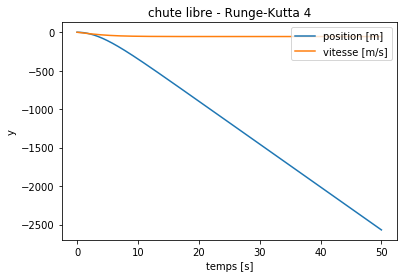

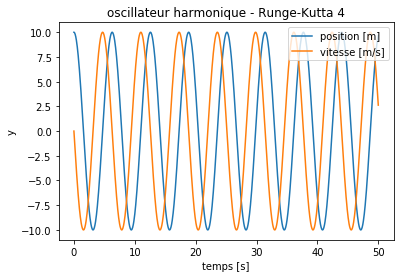

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

class RK4Method():
  def __init__(self, title, edo, t0, ci, time_interval, stop):
    # title of the graph
    self.title = title
    # function that return [y' = CI, y'' = EDO] as a matrix
    self.edo = edo
    self.t0 = t0
    # [y(0), y'(0)]
    self.ci = ci
    self.time_interval = time_interval
    self.stop = stop
    self.time_set = [self.t0]
    self.y_set = [self.ci[:]]
    self.edo_legends = ['position [m]', 'vitesse [m/s]']


  def graph(self): 
    plt.plot(self.time_set, self.y_set)
    plt.title(self.title)
    plt.legend(self.edo_legends, loc="upper right")
    plt.xlabel("temps [s]") 
    plt.ylabel("y")
    plt.show()

  def derivatives(self, tn, y):
    k1 = self.edo(tn, y)
    k2 = self.edo(tn + (self.time_interval / 2), y + ((self.time_interval / 2) * k1))
    k3 = self.edo(tn + (self.time_interval / 2), y + ((self.time_interval / 2) * k2))
    k4 = self.edo(tn + self.time_interval, y + (self.time_interval * k3))
    return (k1 + 2*k2 + 2*k3 + k4)

  def resolve(self):
    y = np.array(self.ci) # [I(0), X(0)]

    self.time_set.append(self.t0) 
    self.y_set.append(y.copy())

    # increment because we want to calculate
    # approximate solution from t + step
    # (we already have t = t_0 given by CI)
    self.t0 += self.time_interval

    # range function for float
    # self._stop + self._time_interval because self._stop is excluded
    for t in np.arange(self.t0, self.stop + self.time_interval, self.time_interval):
      # resolve each first order edo (e.g. position (x'), speed (v'))
      y += (self.time_interval / 6) * self.derivatives(t, y)

      self.time_set.append(t)
      self.y_set.append(y.copy())
    
    self.y_set = np.array(self.y_set)
    
    
t0 = 0
time_interval = 0.05
stop = 50

# function F(t, y)
"""
y => [y, y', y'',...]
"""
def free_fall(t, y):
  # edo as a system of first order edo
  return np.array([
    y[1], # y'
    - 9.81 - 0.00315 * abs(y[1]) * y[1], # y'' = v'
  ])

def harmonic_oscillator(t, y):
  return np.array([
    y[1], # y'
    -y[0] # y'' = v'
  ])

free_fall_rk4 = RK4Method("chute libre - Runge-Kutta 4", free_fall, t0, [0.0, 0.0], time_interval, stop)
free_fall_rk4.resolve()
free_fall_rk4.graph()

harmonic_oscillator_rk4 = RK4Method("oscillateur harmonique - Runge-Kutta 4", harmonic_oscillator, t0, [10.0, 0.0], time_interval, stop)
harmonic_oscillator_rk4.resolve()
harmonic_oscillator_rk4.graph()